In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('./DATA/kc_house_data.csv')

In [46]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [47]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

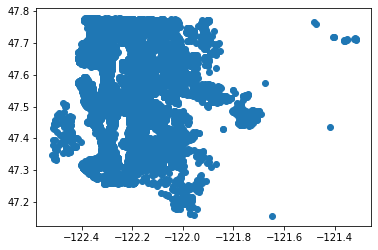

In [48]:
plt.scatter(x='long',y='lat',data=df)

In [49]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [50]:
df= df.drop('id',axis=1)


In [51]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [52]:
df['year'] = df['date'].apply(lambda date:date.year)
df['month'] = df['date'].apply(lambda date:date.month)

In [53]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='year'>

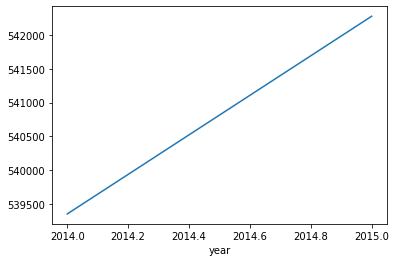

In [54]:
df.groupby('year').mean()['price'].plot()

<AxesSubplot:xlabel='month'>

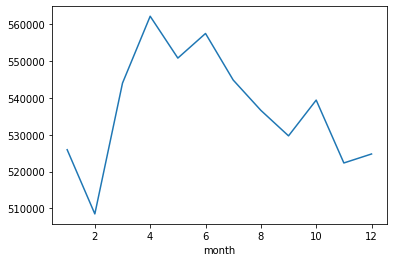

In [55]:
df.groupby('month').mean()['price'].plot()

In [58]:
df = df.drop('date',axis=1)


In [60]:
df = df.drop('zipcode',axis=1)

In [62]:
X = df.drop('price',axis=1).values
Y = df['price'].values
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [65]:
X_train.shape

(15117, 19)

In [66]:
X_test.shape

(6480, 19)

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
scaler.fit(X_train)

MinMaxScaler()

In [70]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [73]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [74]:
model.fit(x=X_train,y=Y_train,
         validation_data = (X_test,Y_test),
         batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 6s 6ms/step - loss: 430236663808.0000 - val_loss: 418885402624.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 428457328640.0000 - val_loss: 412543483904.0000
Epoch 3/400
119/119 [==============================] - 1s 4ms/step - loss: 403096961024.0000 - val_loss: 354902671360.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 287280103424.0000 - val_loss: 185517522944.0000
Epoch 5/400
119/119 [==============================] - 1s 4ms/step - loss: 131221118976.0000 - val_loss: 96979017728.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 98629312512.0000 - val_loss: 94338236416.0000
Epoch 7/400
119/119 [==============================] - 0s 4ms/step - loss: 96538550272.0000 - val_loss: 92469772288.0000
Epoch 8/400
119/119 [==============================] - 1s 4ms/step - loss: 94612652032.0000 - val_loss: 90659094528.0000
Epoch 9/400
119/119 [==

119/119 [==============================] - 0s 3ms/step - loss: 36499341312.0000 - val_loss: 35177996288.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 36392296448.0000 - val_loss: 35062816768.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 36248363008.0000 - val_loss: 34949951488.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 36172570624.0000 - val_loss: 34839724032.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 36060000256.0000 - val_loss: 34813939712.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 35943272448.0000 - val_loss: 34670915584.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 35909758976.0000 - val_loss: 34554400768.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 35770765312.0000 - val_loss: 34458865664.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32574482432.0000 - val_loss: 30950541312.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 32493328384.0000 - val_loss: 30974023680.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32460171264.0000 - val_loss: 30903025664.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32407703552.0000 - val_loss: 30908622848.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32394739712.0000 - val_loss: 30860044288.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32386998272.0000 - val_loss: 30794891264.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32337412096.0000 - val_loss: 31064092672.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 32352247808.0000 - val_loss: 30753570816.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31129739264.0000 - val_loss: 29350074368.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31051433984.0000 - val_loss: 29247805440.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31041984512.0000 - val_loss: 29206544384.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 30998943744.0000 - val_loss: 29188173824.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31026628608.0000 - val_loss: 29160204288.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31003234304.0000 - val_loss: 29340440576.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 30956703744.0000 - val_loss: 29136683008.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 30948755456.0000 - val_loss: 29114355712.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30276562944.0000 - val_loss: 28279506944.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 30281863168.0000 - val_loss: 28223033344.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30282258432.0000 - val_loss: 28212201472.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30249113600.0000 - val_loss: 28198322176.0000
Epoch 271/400
119/119 [==============================] - 0s 4ms/step - loss: 30266486784.0000 - val_loss: 28294905856.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 30241626112.0000 - val_loss: 28217757696.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30211465216.0000 - val_loss: 28412137472.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 30193926144.0000 - val_loss: 28173219840.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29713098752.0000 - val_loss: 27655311360.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 29882163200.0000 - val_loss: 27409451008.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 29604833280.0000 - val_loss: 27360817152.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 29627723776.0000 - val_loss: 27378565120.0000
Epoch 337/400
119/119 [==============================] - 1s 4ms/step - loss: 29604229120.0000 - val_loss: 27329417216.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 29576314880.0000 - val_loss: 27392192512.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 29560467456.0000 - val_loss: 27428706304.0000
Epoch 340/400
119/119 [==============================] - 0s 3ms/step - loss: 29593012224.0000 - val_loss: 27319523328.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 29068535808.0000 - val_loss: 26732939264.0000
Epoch 400/400
119/119 [==============================] - 0s 4ms/step - loss: 29087322112.0000 - val_loss: 26650388480.0000


<AxesSubplot:>

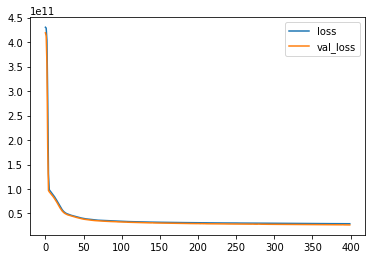

In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [81]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,f1_score

In [77]:
predictions = model.predict(X_test)

203/203 [==============================] - 4s 2ms/step


In [78]:
mean_squared_error(Y_test,predictions)

26650386621.29237

In [79]:
mean_absolute_error(Y_test,predictions)

100581.5250036169

In [80]:
explained_variance_score(Y_test,predictions)

0.7991227919928657

In [83]:
#f1_score(Y_test,predictions)

In [84]:
model.save('PredictPriceOfHouse.h5')